# Multitasking Quantitative User Performance Analysis Demo
## Dr. Greg Placencia

## Objective:  
Students who successfully finish this notebook should be able to:
- Read a file into a dataframe
- Print information about data in a dataframe
- Clean dirty data from a source file
- Visualize data
- Conduct a t-test in Python

# Import libraries

In [88]:
#install libraries
#!pip install polars

# import libraries for analysis
import numpy as np
import pandas as pd
import polars as pl #https://pola.rs/

import scipy.stats as stats #statistics library; https://scipy.org/

#import libraries for visualization
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #import visualization library

# Create DataFrame
## Change file name to mt_lab_data.csv as needed
## Clean cvs file of uneccessary columns.

In [101]:
# Read csv file.
# Uncomment the one you want to use

# Pandas Dataframe
df = pd.read_csv('mt_lab_data.csv')

# Polars DataFrame
# Faster performance
#df = pl.read_csv('mt_lab_data.csv')

# check if we are using a pandas or polars dataframe
"""Checks if the given object is a pandas DataFrame or a Polars DataFrame.
  Args:
    df: The object to check.
  Returns:
    A string indicating the type of the DataFrame or None if it's not a DataFrame.
  """

if isinstance(df, pl.DataFrame):
    print("Using polars DataFrame")
if isinstance(df, pd.DataFrame):
    print("Using pandas DataFrame")

Using pandas DataFrame


# Print first 5 entries and Remove data we dont need

In [104]:
print("First Five Row of Data\n", df.head()) #print first 5 entries

First Five Row of Data
           ID  Gender  Task t1  Task t2  Task e1  Task e2  Task Ratings_1  \
0  015869477     1.0    74.00    38.00      3.0      0.0             4.0   
1  014391117     1.0    69.00    35.00      1.0      1.0             4.0   
2  015128607     NaN    59.19    34.25      1.0      1.0             4.0   
3   14496066     1.0    60.92    31.40      0.0      0.0             4.0   
4  015292602     1.0    54.03    35.29      2.0      0.0             4.0   

   Task Ratings_2                                     Task Sentiment  \
0             2.0  I felt that the first task was more difficult ...   
1             1.0  It does require more thought in writing each c...   
2             1.0  For task 1, there were too many things to keep...   
3             1.0  I had to take a moment to think and realize wh...   
4             1.0  Task 1 felt more difficult because of the swit...   

   block2progress  random  
0             NaN     2.0  
1             NaN     1.0  
2 

# Examine and Cleanup Data

# Print Descriptive Data
A first step should be to examine the data for missing data.

In [108]:
print(df.describe())

if isinstance(df, pd.DataFrame): # pandas needs to check for nulls, polars does it by itself
    if df.isnull: # check if null values
        print('Missing Data Raw\n')
        print(df.isna().sum()) # print number of empty cells

           Gender     Task t1     Task t2     Task e1     Task e2  \
count  122.000000  121.000000  121.000000  121.000000  121.000000   
mean     1.286885   63.992479   33.431322    0.851240    0.264463   
std      0.472019   16.036393    9.528641    1.288805    0.667940   
min      1.000000    1.080000   20.790000    0.000000    0.000000   
25%      1.000000   55.000000   28.340000    0.000000    0.000000   
50%      1.000000   62.000000   32.090000    0.000000    0.000000   
75%      2.000000   71.000000   36.000000    1.000000    0.000000   
max      3.000000  119.000000   99.000000    9.000000    4.000000   

       Task Ratings_1  Task Ratings_2  block2progress      random  
count      121.000000      121.000000             0.0  124.000000  
mean         3.537190        1.528926             NaN    1.516129  
std          0.922328        0.775396             NaN    0.501767  
min          1.000000        1.000000             NaN    1.000000  
25%          3.000000        1.000000 

# Impute Values as needed [1] - [2]
If there are missing values we can remove them from the dataframes.  
Unfortunately we lose datapoints this way and reinforce data bias.
  
It is better to clean the data by using existing data:

In [111]:
if isinstance(df, pd.DataFrame): # check if pandas dataframe
    df['Task t1'].fillna(df['Task t1'].mean(), inplace = True) #use column mean to fill missing data
    df['Task t2'].fillna(df['Task t2'].mean(), inplace = True) #use column mean to fill missing data
    df.isna().sum()

if isinstance(df, pl.DataFrame): # check if polars dataframe
    df.select(pl.mean("Task t1", "Task t2"))

# Analyze and Visualize Differences in Data
It also helps to visualize data if the dimensionality is low (<4)

In [114]:
# Create proper dataframe
if isinstance(df, pd.DataFrame):
    task_data = df.loc[:, ['Task t1', 'Task t2']]
    task_data.rename({'Task t1': 'Task 1', 'Task t2': 'Task 2'}, axis=1, inplace=True)
    
if isinstance(df, pl.DataFrame):
    task_data = df.select(["Task t1", "Task t2"])
    task_data = task_data.rename({"Task t1":"Task 1", "Task t2":"Task 2"})

print(task_data.head())
print(task_data.describe())

   Task 1  Task 2
0   74.00   38.00
1   69.00   35.00
2   59.19   34.25
3   60.92   31.40
4   54.03   35.29
           Task 1      Task 2
count  130.000000  130.000000
mean    63.992479   33.431322
std     15.466871    9.190238
min      1.080000   20.790000
25%     55.427500   28.702500
50%     63.496240   33.000000
75%     70.000000   35.560000
max    119.000000   99.000000


## Show Task Time Distribution
A common practice is to create a histogram to show the underlying disribution.  
A Kernal Density Estimator (KDE) is often shows this much more smoothly.

<class 'pandas.core.frame.DataFrame'>


C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Count')

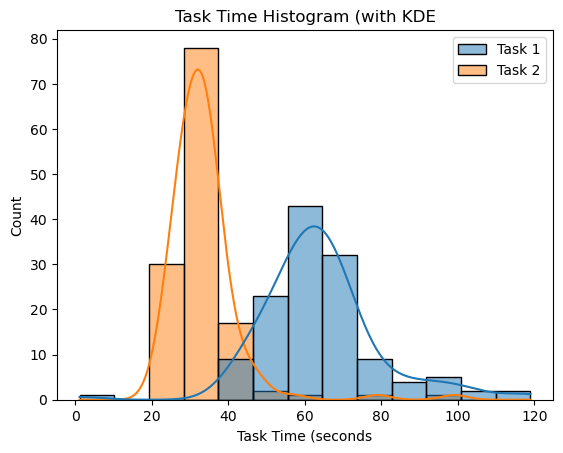

In [119]:
#print(type(task_data))

if isinstance(df, pd.DataFrame):
    plot = sns.histplot(data=task_data, kde = True) # Create task time histogram
if isinstance(df, pl.DataFrame):
    plot = sns.histplot(data=task_data.to_pandas(), kde = True) # Create task time histogram

plot.set_title("Task Time Histogram (with KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Count")

C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Percentage')

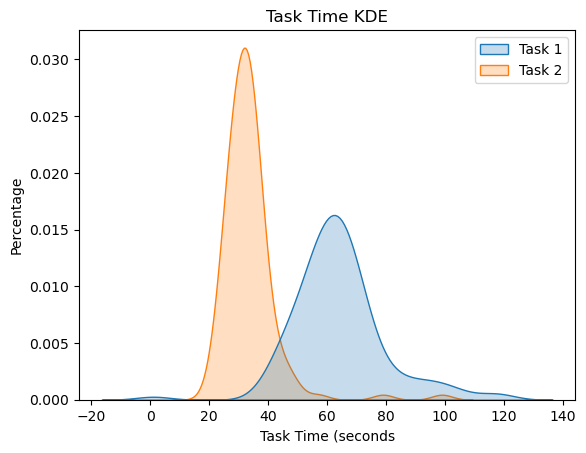

In [127]:
plot.set_title("Task Time Histogram (with KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Count")

if isinstance(df, pd.DataFrame):
    plot = sns.kdeplot(data=task_data, fill = True) # Create task time Kernal Desensity Estimation
if isinstance(df, pl.DataFrame):
    plot = sns.kdeplot(data=task_data.to_pandas(), fill = True) # Create task time Kernal Desensity Estimation

plot.set_title("Task Time KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Percentage")

## Show Scatterplot
A scatterplot often shows clusters in data

Text(0, 0.5, 'Task Completion Time (seconds)')

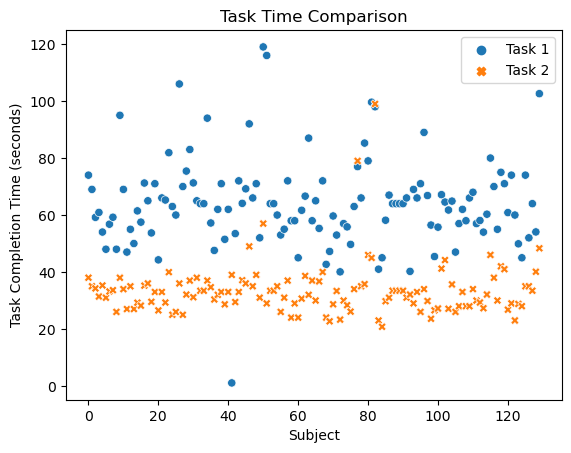

In [129]:
if isinstance(df, pd.DataFrame):
    plot = sns.scatterplot(data=task_data)
if isinstance(df, pl.DataFrame):
    plot = sns.scatterplot(data=task_data.to_pandas())

plot.set_title("Task Time Comparison")
plot.set_xlabel("Subject")
plot.set_ylabel("Task Completion Time (seconds)")

# Jointplot [4]
Notice that histograms and line graphs are 2 dimensional, and may not show data differences as well.  
Jointplots may help by plotting two distributions against each to give an "overhead" map 
  
Jointplots in seabornr use the following:  
- kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }  
  
Scatter is the default  

C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

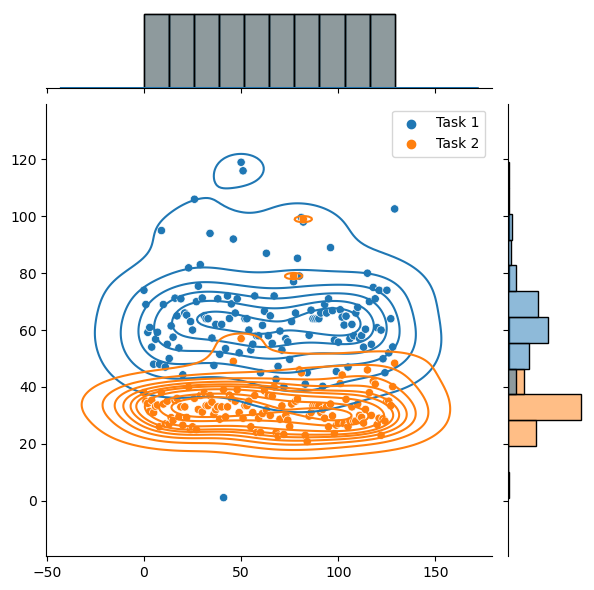

In [132]:
if isinstance(df, pd.DataFrame):
    plot = sns.jointplot(data=task_data, kind="kde")
if isinstance(df, pl.DataFrame):
    plot = sns.jointplot(data=task_data.to_pandas(), kind="kde")

plot.plot(sns.scatterplot, sns.histplot)

# Finding if data is statistically different
Student’s t-test, is a method to test whether the difference between two groups is statistically significant or not.
We start by assuming there is no statistical difference, i.e. the null hypthesis. Any difference in means is a result of chance, not.  
A simple way to do this is to compare the average difference between the two tasks to see if it is statistically significant. This is called a within-subject paired Student's t-test or paired samples t-test because the participants are the same, only the tasks differ, hence paired data.  
   
The t distribution is a family of curves that is specified by the number of degrees of freedom (the number of independent observations in the sample minus one). The t distribution approaches the bell shape of the standard normal distribution as sample size, and thus the degrees of freedom, increases.  
In practice, tests involving the mean of a sample of size greater than 30, we usually apply the normal distribution instead.

## Find the difference in the data and plot it

         Task 1     Task 2  Difference
0     74.000000  38.000000   36.000000
1     69.000000  35.000000   34.000000
2     59.190000  34.250000   24.940000
3     60.920000  31.400000   29.520000
4     54.030000  35.290000   18.740000
..          ...        ...         ...
125   74.000000  35.000000   39.000000
126   52.000000  35.000000   17.000000
127   63.992479  33.431322   30.561157
128   54.070000  40.100000   13.970000
129  102.600000  48.340000   54.260000

[130 rows x 3 columns]


C:\Users\gvplacencia\AppData\Local\anaconda3\envs\CPP\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Percentage')

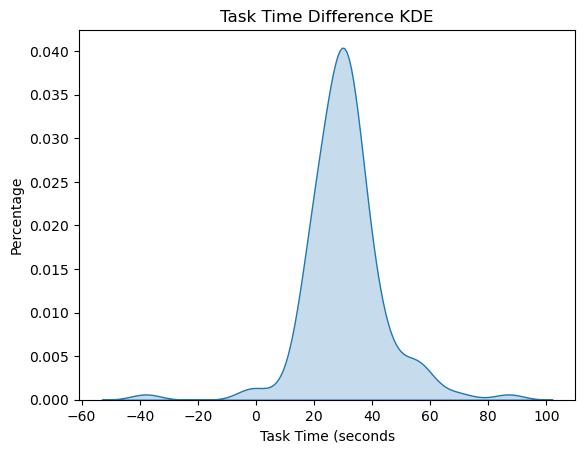

In [149]:
difference = task_data["Task 1"] - task_data["Task 2"]  # Calculate difference directly

print(task_data)

if isinstance(df, pd.DataFrame):
    plot = sns.kdeplot(data=difference, fill = True) # Create task time difference histogram
if isinstance(df, pl.DataFrame):
    plot = sns.kdeplot(data=difference.to_pandas(), fill = True) # Create task time difference histogram

plot.set_title("Task Time Difference KDE")
plot.set_xlabel("Task Time (seconds")
plot.set_ylabel("Percentage")

# Calculate if the difference is statistically significant
For this we assume that alpha = 0.05 is our significance level  
The formula to get the t value is:  
$$
t = \frac{\sum D} {\sqrt {\frac{{n}{\sum D^2}{-({\sum D})^2}} {n-1}}}
$$

## References
- https://jupyterbook.org/en/stable/content/math.html  
- https://docs.mathjax.org/en/latest/

# Calculate Task Time paired t test (Within Subject t-test)
alpha = 0.05 # significance  
#ref: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html

In [153]:
result = stats.ttest_rel(task_data['Task 1'], task_data['Task 2'], alternative='greater')

print(result)
print(f'statistic: {result.statistic:.3}')
print(f'pvalue: {result.pvalue:.3}')
print(f'Degrees of Fredom (dof = n-1): {result.df}')

TtestResult(statistic=26.013358805781202, pvalue=1.8495520608909163e-53, df=129)
statistic: 26.0
pvalue: 1.85e-53
Degrees of Fredom (dof = n-1): 129


## Discussion

### References:
[1] Pierre Sadrach. (2020). Pandas Tricks for Imputing Missing Data: Imputing Data with Pandas. Medium: Towards Data Science. Jun 4, 2020. Online https://towardsdatascience.com/pandas-tricks-for-imputing-missing-data-63da3d14c0d6. Accessed  October 18, 2023

[2] Ismiguzel, I. (2022). Imputing missing data with simple and advanced techniques. Medium: Towards Data Science. 2022, May 12. Online. https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87. Accessed Sept 8, 2024.

[3] https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

[4] seaborn.jointplot. online https://seaborn.pydata.org/generated/seaborn.jointplot.html. accessed October 18, 2023.

Sentiment Analysis: https://towardsdatascience.com/a-beginners-guide-to-sentiment-analysis-in-python-95e354ea84f6  
Word Cloud: https://medium.com/@siglimumuni/natural-language-processing-in-python-exploring-word-frequencies-with-nltk-918f33c1e4c3  
Topic Modeling:  

LDA: https://medium.com/@corymaklin/latent-dirichlet-allocation-dfcea0b1fddc#:~:text=37,organize%20and%20search%20through%20documents  
